In [1]:
import gzip
import brotli
import blosc

import timeit

import matplotlib.pyplot as plt
import numpy as np


In [2]:
with open("scripts/0-512_0-512_64-80", "rb") as rawfile:
    raw_data = rawfile.read()



In [3]:
def compress_test(raw_data, compress_func, **kwargs):
    comp_data_len = len(compress_func(raw_data, **kwargs))
    print(f"{compress_func.__module__} {kwargs}", comp_data_len)
    result = %timeit -n1 -r5 -o compress_func(raw_data, **kwargs)
    return result, comp_data_len

In [5]:
gz_size, gz_qq, gz_results, gz_decompress_results = [], [], [], []
for q in range(1, 10):
    result, comp_data_len = compress_test(raw_data, gzip.compress, compresslevel=q)
    gz_results.append(result)
    gz_qq.append(q)
    gz_size.append(comp_data_len)

    #decompress test
    comp_data = gzip.compress(raw_data, compresslevel=q)
    result, _ = compress_test(comp_data, gzip.decompress)
    gz_decompress_results.append(result)



gzip {'compresslevel': 1} 6556868
245 ms ± 2.49 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
73.8 ms ± 1.47 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 2} 6533966
260 ms ± 1.93 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
70 ms ± 4.29 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 3} 6505599
322 ms ± 673 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
68 ms ± 400 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 4} 6581685
358 ms ± 2.88 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
67.1 ms ± 670 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 5} 6554756
424 ms ± 2.55 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
66.2 ms ± 952 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 6} 6539684
459 ms ± 781 µs per loop (mean ± std. d

In [6]:
br_results, br_size, qq, brotli_decompress_results = [], [], [], []
for q in range(1, 9):
    result, comp_data_len = compress_test(raw_data, brotli.compress, quality=q)
    br_size.append(comp_data_len)
    br_results.append(result)
    qq.append(q)


    #decompress test
    comp_data = brotli.compress(raw_data, quality=q)
    result, _ = compress_test(comp_data, brotli.decompress)
    brotli_decompress_results.append(result)


brotli {'quality': 1} 6698383
34.2 ms ± 4.26 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
55.9 ms ± 193 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 2} 6523722
94.8 ms ± 475 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
57.9 ms ± 126 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 3} 6500608
123 ms ± 592 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
57.9 ms ± 260 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 4} 6634749
120 ms ± 429 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
56.4 ms ± 1.44 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 5} 6111878
675 ms ± 4.53 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
83.8 ms ± 333 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 6} 6043467
952 ms ± 3.15 ms per loop (mean ± std. dev. o

In [7]:
blosc_results, blosc_size, blosc_q, blosc_decompress_results = [], [], [], []
for q in range(3, 10):
    result, comp_data_len = compress_test(raw_data, blosc.compress, clevel=q)
    blosc_size.append(comp_data_len)
    blosc_results.append(result)
    blosc_q.append(q)

    #decompress test
    comp_data = blosc.compress(raw_data, clevel=q)
    result, _ = compress_test(comp_data, blosc.decompress)
    blosc_decompress_results.append(result)


blosc.toplevel {'clevel': 3} 8388624
7.25 ms ± 418 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
1.3 ms ± 153 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 4} 8380400
6.69 ms ± 229 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
585 µs ± 14.6 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 5} 8277772
9.33 ms ± 178 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
690 µs ± 34.4 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 6} 6783979
11.1 ms ± 38.9 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
2.65 ms ± 80.5 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 7} 6458747
11.8 ms ± 1.27 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
2.97 ms ± 151 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blo

Text(0.5, 0, 'compression level')

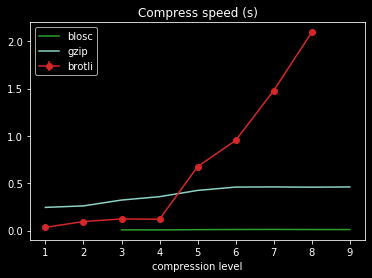

In [8]:
fig, ax1 = plt.subplots()
y = [sum(t.timings)/len(t.timings) for t in br_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in br_results]
h1 = ax1.errorbar(qq, y, yerr, fmt="-o", color='tab:red', label="brotli")

y = [sum(t.timings)/len(t.timings) for t in blosc_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in blosc_results]
h2 = ax1.plot(blosc_q, y, color='tab:green', label="blosc")

y = [sum(t.timings)/len(t.timings) for t in gz_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in gz_results]
h3 = ax1.plot(gz_qq, y, label="gzip")


ax1.legend()
ax1.set_title("Compress speed (s)")
ax1.set_xlabel("compression level")

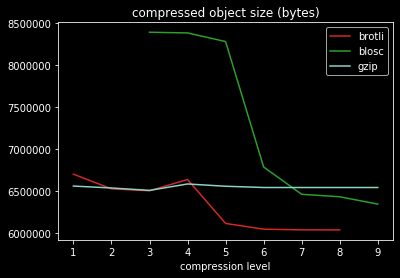

In [9]:
fig, ax2 = plt.subplots()
ax2.plot(qq, br_size, color='tab:red', label="brotli")
ax2.plot(blosc_q, blosc_size, color="tab:green", label="blosc")
ax2.plot(gz_qq, gz_size, label="gzip")
ax2.legend()

ax2.set_title("compressed object size (bytes)")
ax2.set_xlabel("compression level")

plt.show()


Text(0.5, 0, 'compression level')

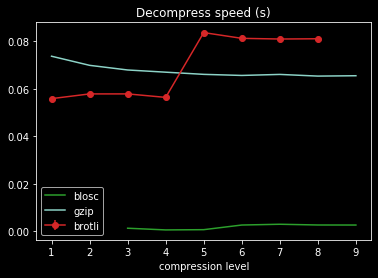

In [11]:
fig, ax1 = plt.subplots()
y = [sum(t.timings)/len(t.timings) for t in brotli_decompress_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in brotli_decompress_results]
h1 = ax1.errorbar(qq, y, yerr, fmt="-o", color='tab:red', label="brotli")

y = [sum(t.timings)/len(t.timings) for t in blosc_decompress_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in blosc_decompress_results]
h2 = ax1.plot(blosc_q, y, color='tab:green', label="blosc")

y = [sum(t.timings)/len(t.timings) for t in gz_decompress_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in gz_decompress_results]
h3 = ax1.plot(gz_qq, y, label="gzip")


ax1.legend()
ax1.set_title("Decompress speed (s)")
ax1.set_xlabel("compression level")